# diffusion map

# motivation

- Euclidean distance is misleading

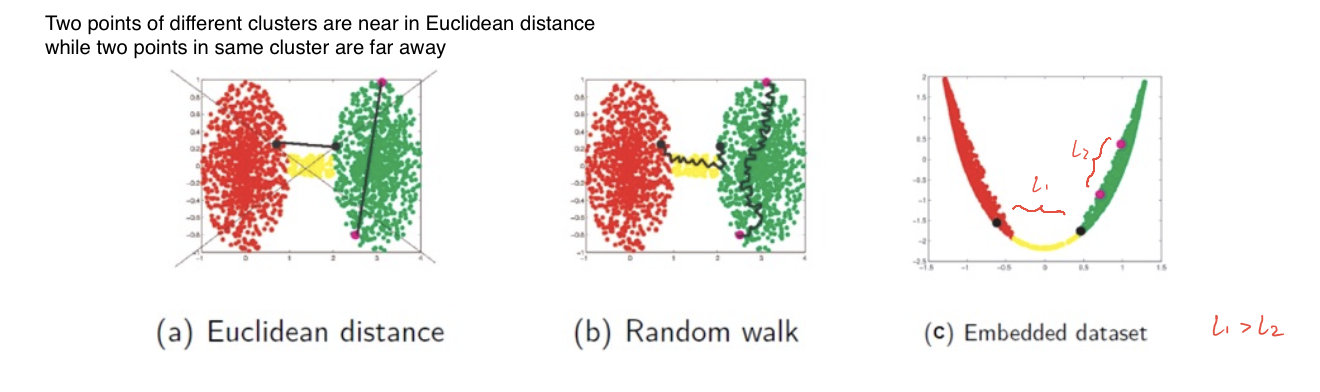

# terminology:

diffusion operators = Markov (transition) matrix = Markov Chain

entries in affinity matrix is called affinities

entries in Markov matrix is called transition probabilities

entries in powered Markov matrix is called t steps random walk transition probabilities

diffusion maps: embedding of data by diffusion map

# algo

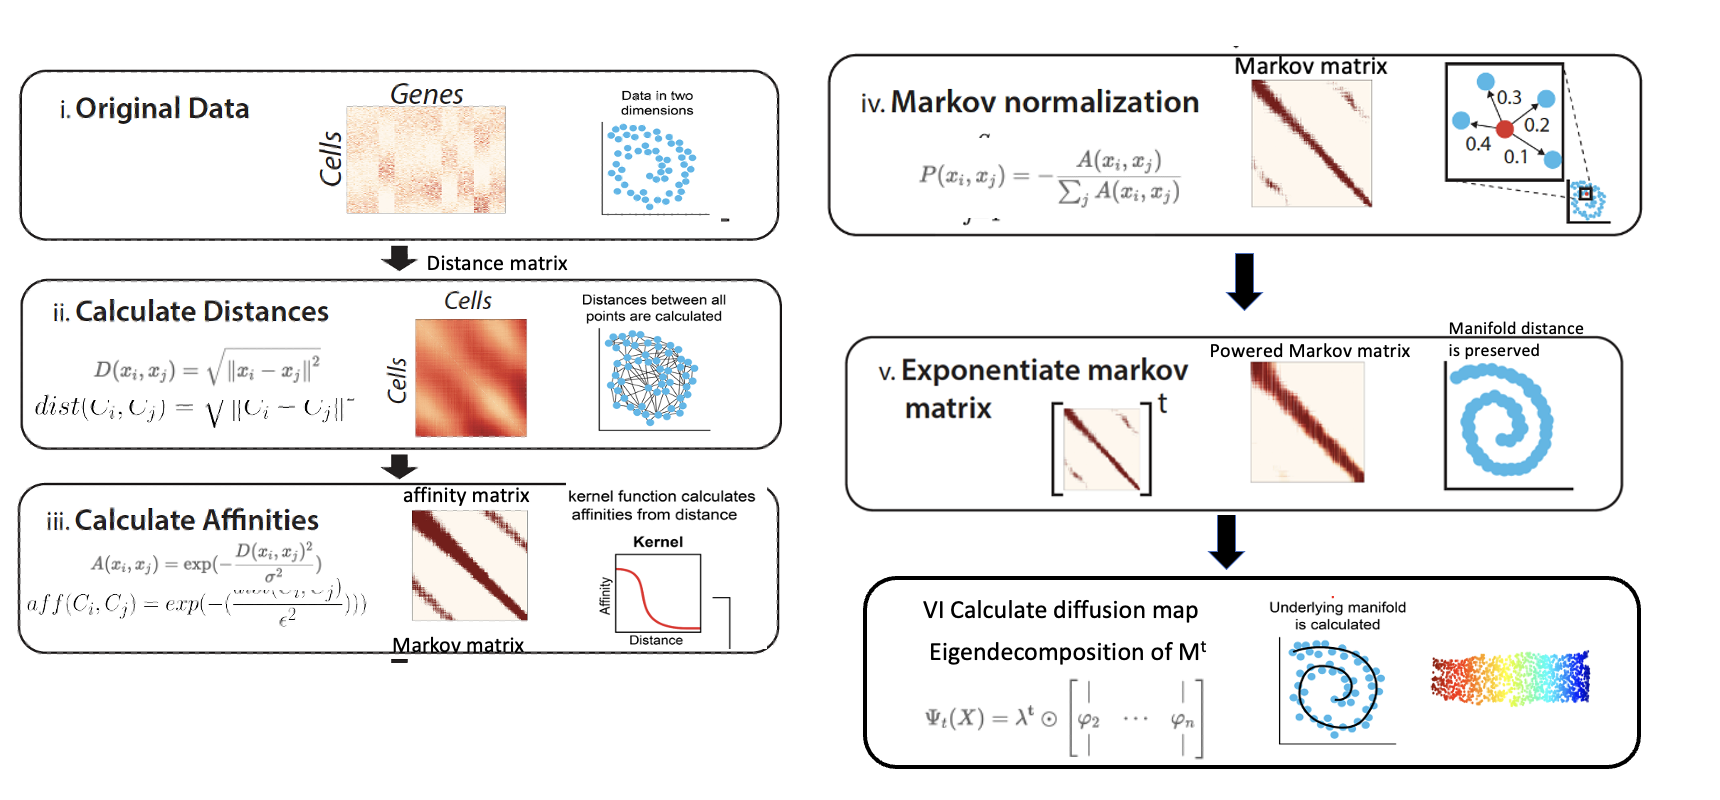

steps:

1. compute distance matrix D (Euclidean distance)


2. compute affinity matrix A (Gaussian kernel)


3. compute Markov matrix P (row normalized affinity)


4. compute Powered Markov matrix $P^t$


5. compute diffusion maps

## step 1: compute distance matrix (Euclidean distance)

- compute pairwise Euclidean distance between 2 data points to get a symmetric distance matrix $D$

$$
D(x_i, x_j)=\sqrt{\left \| x_i -x_j \right \|^2}
$$

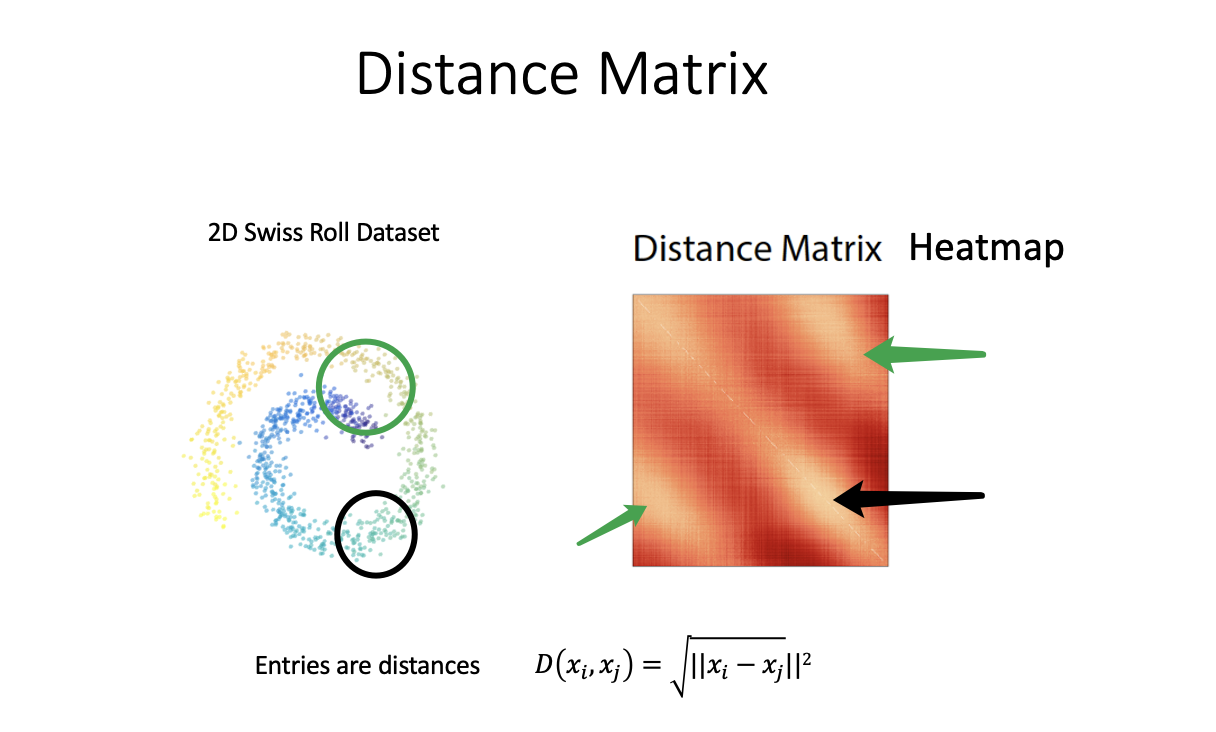

- for distance matrix heatmap

    - left diagonal: true dense points in the roll
    
    - side left diagonal: close points in different layers of roll (noise)

## step 2: compute affinity matrix (Gaussian kernel)

- pass distance matrix to a kernel function to get a symmetric affinity matrix A

$$
A(x_i, x_j) = \exp \left[- \left(\frac{D(x_i, x_j)}{\sigma}\right)^2\right]
$$

where $\sigma$ is bandwidth, i.e. standard deviation of Gaussian kernel

- **key property of affinity matrix: only local relationships are preserved**

- by applying kernel function, distances are **inversed**,

    heatmap: side bins fade and localize connections,
    
    graph representation: but still don't totally clean the noisy connections

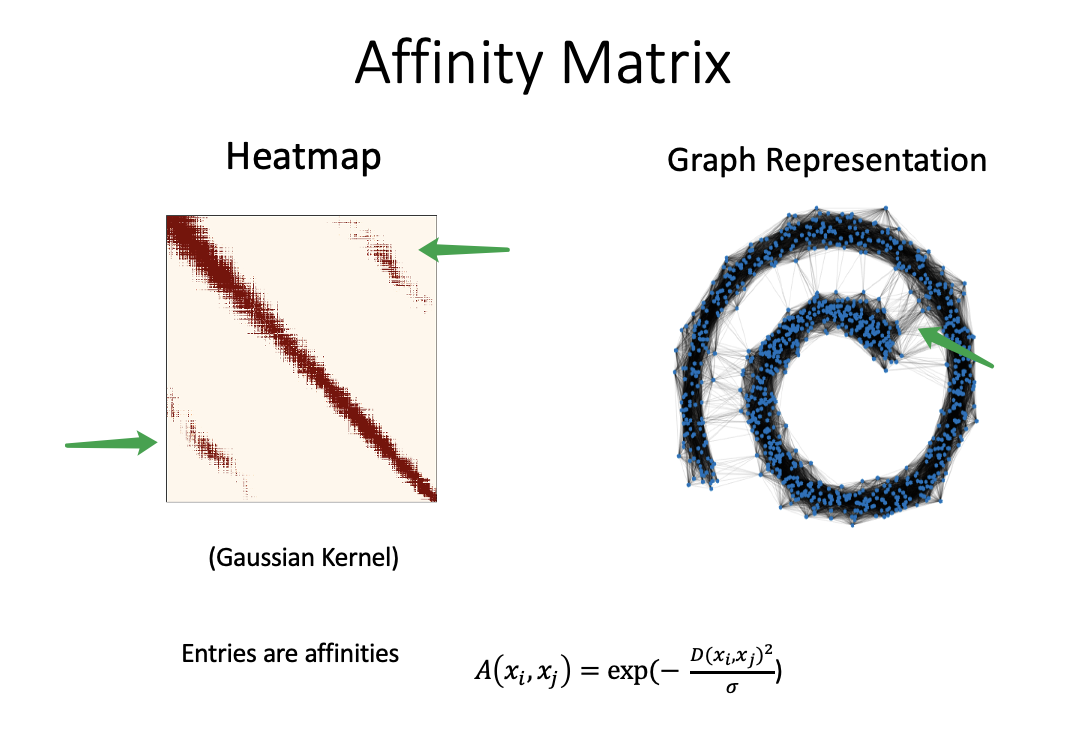

## step 3: compute Markov matrix

- row normalize affinity matrix to get Markov matrix P

$$
P=D^{-1}A
$$

$$
P(x_i, x_j) = -\frac{A(x_i, x_j)}{\sum_j A(x_i, x_j)}
$$

where i,j th entry $P(x_i, x_j)$ is row normalized affinity


- after row normalization, the ith row of Markov matrix represents **transition probability** distribution from ith point (node) to its neighbors

    the entries in ith row sum up to 1
    
    $$
    \sum p_i = 1
    $$

- diffusion shares info between nodes


- **diffusion distance** ≈ random walk distance = starting from point x vs. starting from point y, overall difference in transition probability after t steps.

- diffusion distance is robust to noise

### transition probability

- transition probability: **inverse proportional** to distance 和距离成反比

    the farther the distance between 2 points,
    
    the lower the probability of going from one point to another


- t = 1

    for point $a_1$, 4 choices with different transition probabilities and they all sum up to 1:
    
$$    
\left\{\begin{matrix}
\text{stay at } a_1 & 0.35\\ 
a_1 \rightarrow a_2 & 0.3\\ 
a_1 \rightarrow a_3 & 0.3\\ 
a_1 \rightarrow a_5 & 0.05
\end{matrix}\right.
$$

$$
\sum p_i = 0.35+0.3+0.3+0.05=1
$$

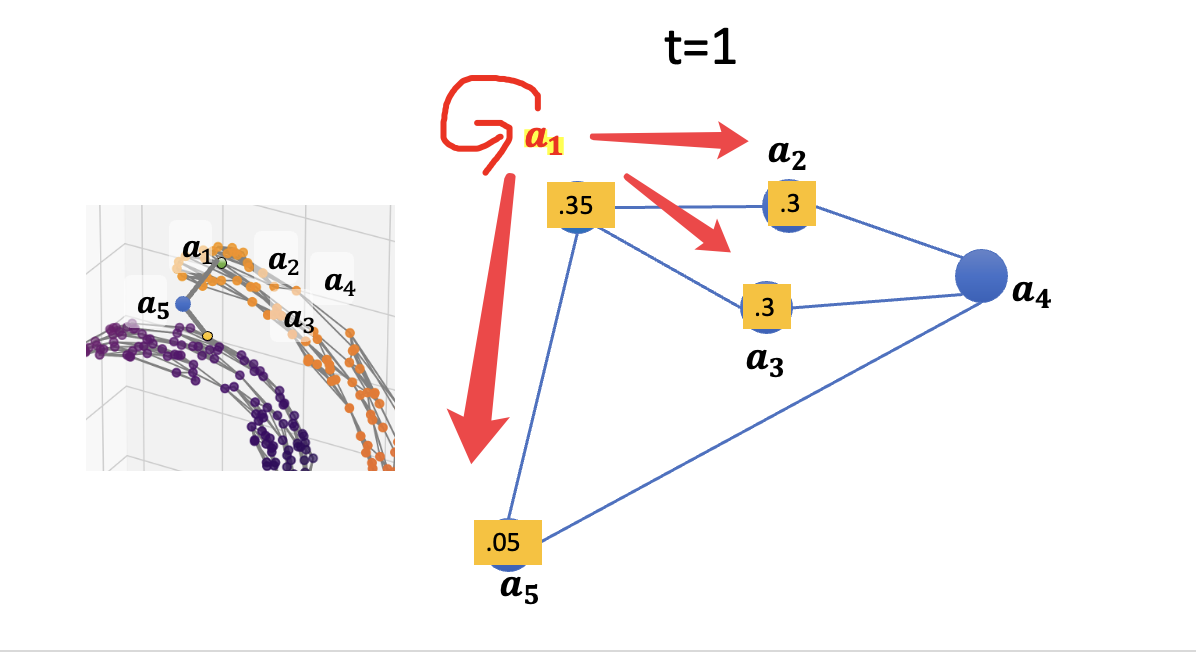

### diffusion operator

- diffusion operator define **Markov Chains** $P$


- Markov Chains are **NOT** symmetric matrix


- eigendecomposition of **Markov Chains** $P$

    - right eigenvectors $\neq$ left eigenvectors

    - right eigenvectors $u$: computed from $Pu = \lambda u$

    - left eigenvectors $u'$: computed from $u'P = \lambda u'$

    - **steady state vector**: 1st left eigenvector corresponding to eigenvalue $\lambda=1$

    - 1st right eigenvector corresponding to eigenvalue $\lambda=1$ is **trivial** unless graph is disconnected

    - All eigenvectors have magnitude $\leq 1$


- powering a diffusion operator $P$ is equivalent to powering only its eigenvalues

$$
P^t = U \Lambda ^t U^{-1}
$$

$$
\Lambda ^t=\begin{bmatrix}
\lambda _1^t &  &  & \\ 
 & \lambda _2^t &  & \\ 
 &  & \ddots & \\ 
 &  &  & \lambda _n^t
\end{bmatrix}
$$

where $\Lambda$ is a diagonal matrix contains eigenvalues $\lambda$

## step 4: compute Powered Markov matrix $P^t$

- take power $t$ of Markov matrix, where $t$ is number of steps random walk


- the ith row of Powered Markov matrix $P^t$ is t steps random walk probabilities of going from ith point to another


- heatmap of Powered Markov matrix $P^t$:

    - left diagonal: true dense points in the roll, becomes even bolder

    - side left diagonal: close points in different layers of roll (noise), almost disappear
    

- graph representation of Powered Markov matrix $P^t$:

    noisy connections between manifold disappear

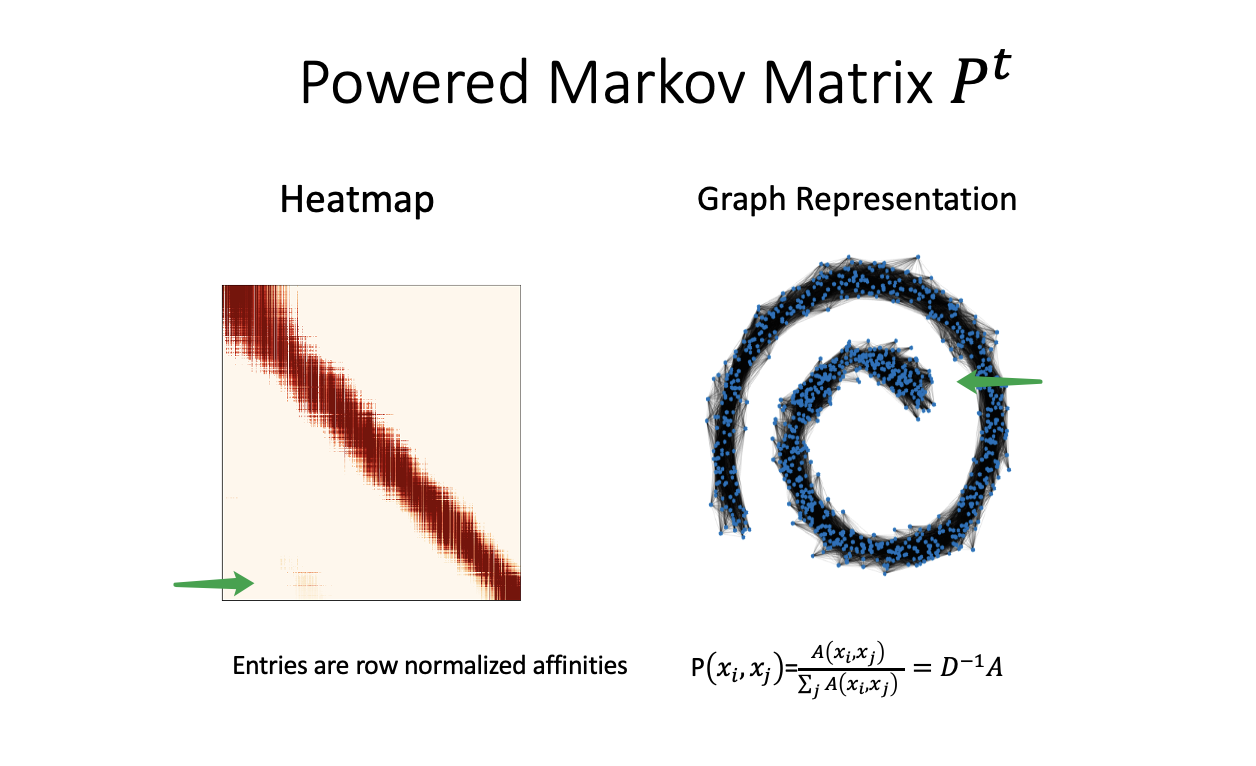

- t = 2

    for point $a_1$, 13 choices with different transition probabilities and they all sum up to 1:
    
$$    
\left\{\begin{matrix}
\text{stay at }a_1 & \rightarrow \left\{\begin{matrix}
\text{stay at }a_1\\ 
a_2\\ 
a_3\\ 
a_5
\end{matrix}\right.\\ 
a_1 \rightarrow a_2 & \rightarrow \left\{\begin{matrix}
a_1\\ 
\text{stay at }a_2\\ 
a_4
\end{matrix}\right.\\
a_1 \rightarrow a_3 & \rightarrow \left\{\begin{matrix}
a_1\\ 
\text{stay at }a_3\\ 
a_4\\ 
\end{matrix}\right.\\ 
a_1 \rightarrow a_5 & \rightarrow \left\{\begin{matrix}
a_1\\ 
a_4\\ 
\text{stay at }a_5\\ 
\end{matrix}\right.
\end{matrix}\right.
$$


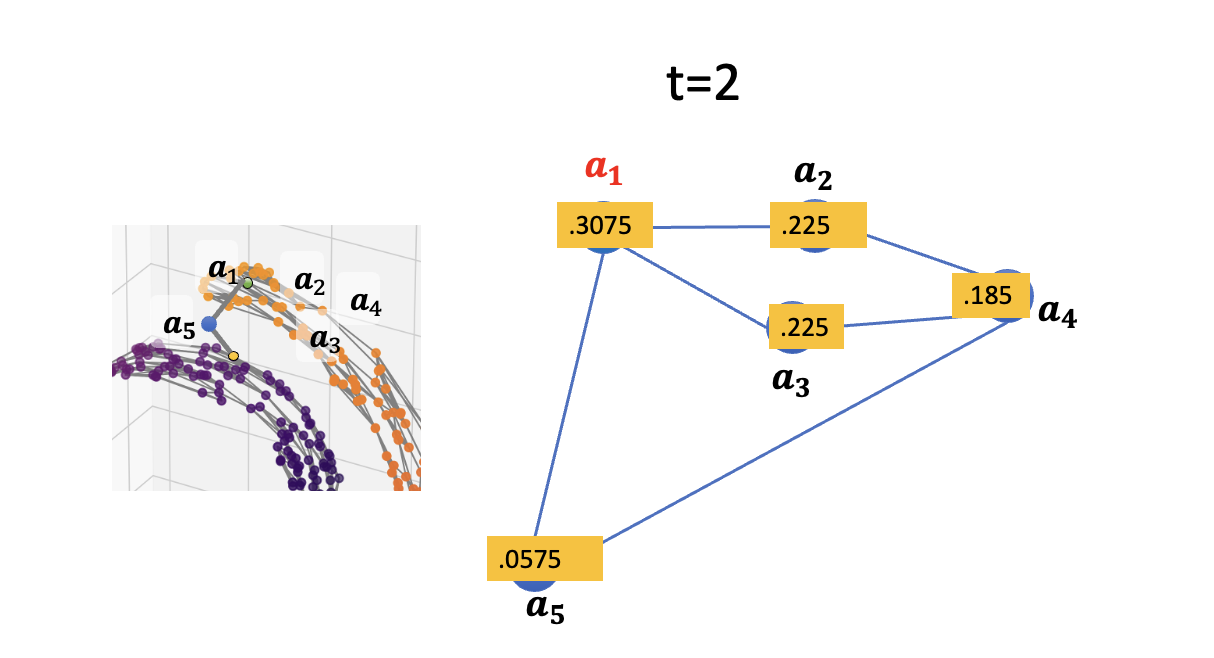

- after t=10 steps random walk,

    probability of going to denser region ($a_2, a_3, a_4$) is larger than going to sparser region $a_5$: 0.224 > 0.104
    
    that makes sense coz noise ($a_5$) tend to be in sparse region

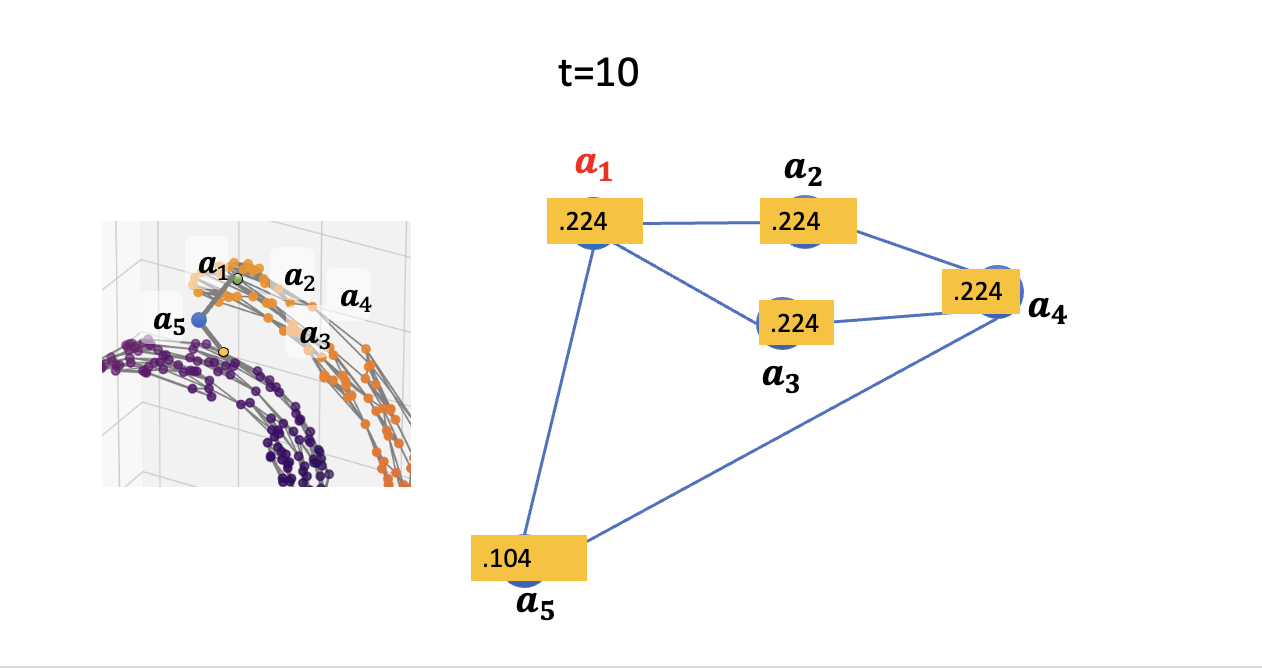

## step 5: compute diffusion maps

- eigendecomposition of diffusion operators to get eigenvectors and eigenvalues


- **first** nontrivial eigenvector gives us the **longest coil dim of data**


- diffusion maps is calculated by weighting **right** eigenvectors by its corresponding eigenvalues

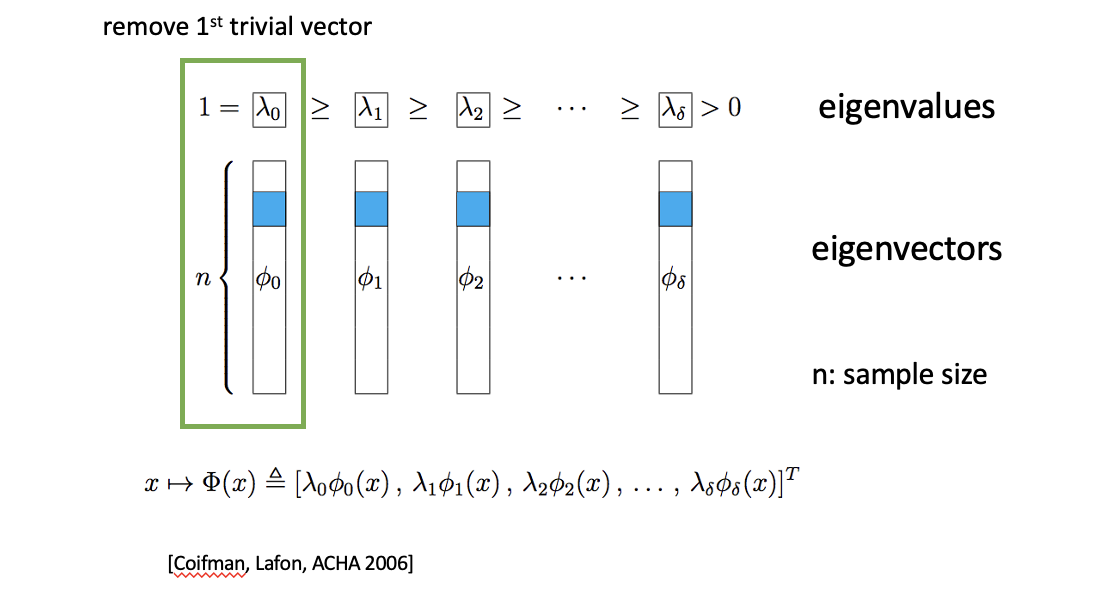

- coz 1st right eigenvector $\phi_0$ of diffusion operator $P$ is a trivial vector corresponding 1st eigenvalue $\lambda_0=1$, 

    we remove it from eigenvectors

# Swiss roll dataset

- first non-trivial eigenvector of diffusion map tracks the most prominent non-linear path to uncoil the 3D space to 2D

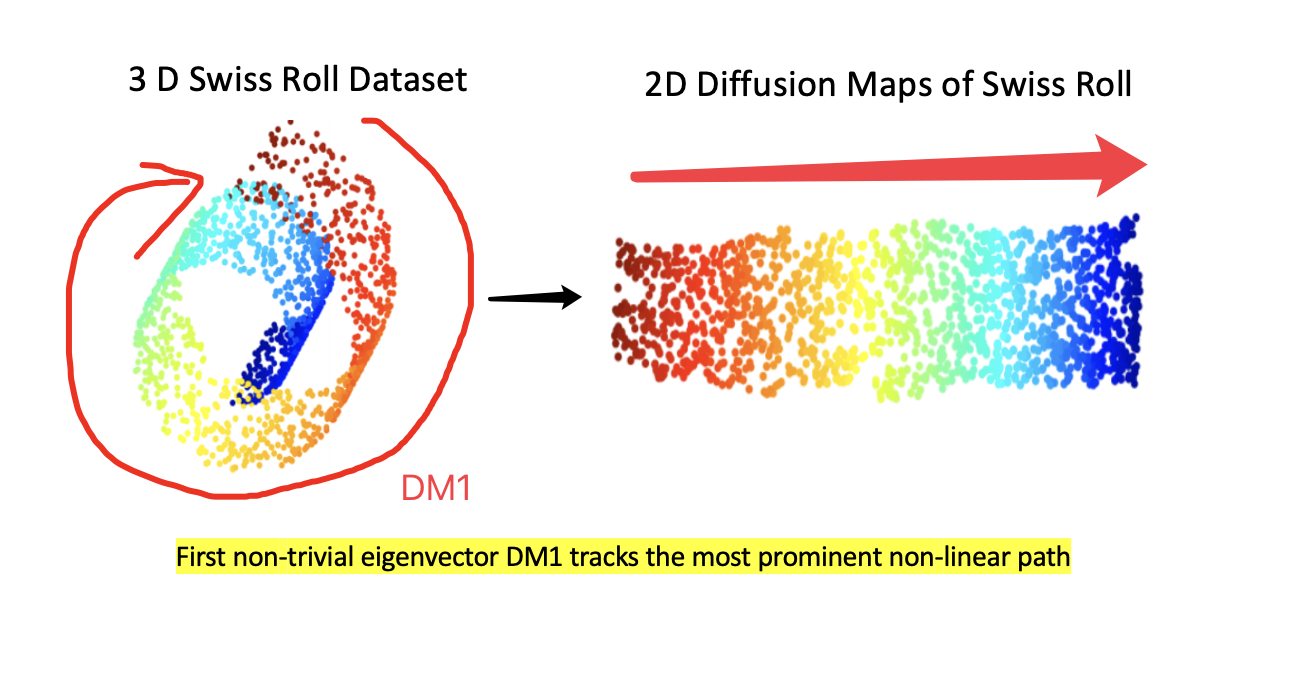

# Lips Dataset: spoke digits

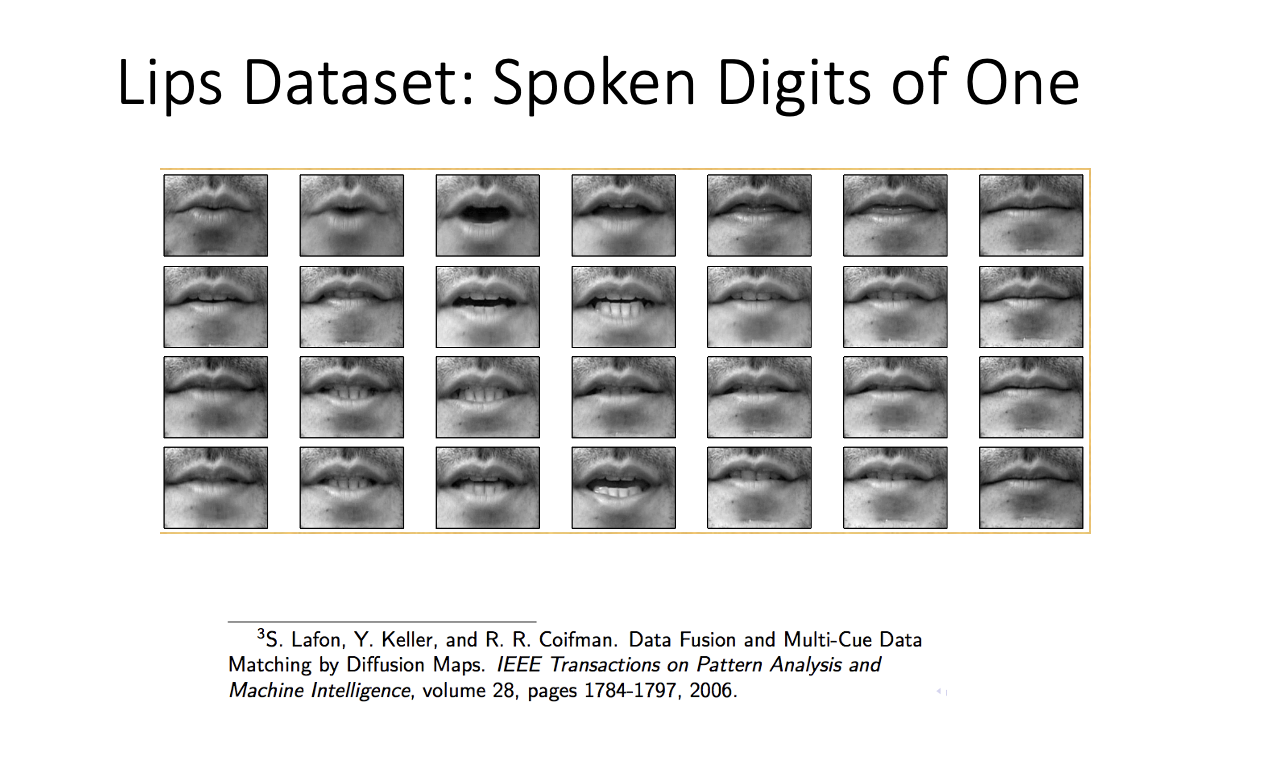

- by applying diffusion map to lips dataset, 

    we can see the variation of lip images is only in 2D:

    - 1D: opening of mouth
    
    - 1D: portion of teeth visible
    

- diffusion maps give a lips Manifold, a 2D intrinsic state space which can be mapped out with just these diffusion eigenvectors


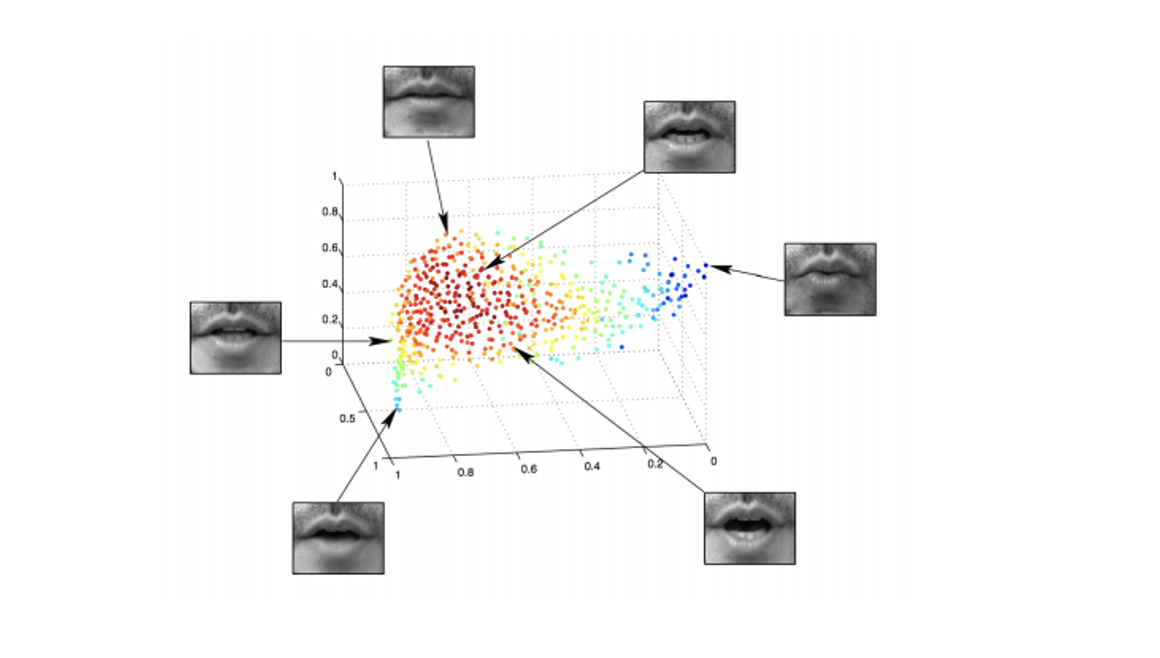

# implementation

- NeurIPS paper "Diffusion Maps, Spectral Cluster, Eigenvectors OF Rokker-Planck Operators"

- function: diffusion mapping $\Psi_t: \mathbb{R}^{n \times p} \rightarrow \mathbb{R}^{n \times (n-1)}$


- input: 

    - dataset $X = \left \{ x_1,...,x_n \right \} \in \mathbb{R}^{n \times p}$, where $n$ is sample size, $p$ is number of features
    
    - kernel function $\mathcal{K} (;): \mathbb{R}^p \times \mathbb{R}^p \rightarrow \mathbb{R}$
    
    - diffusion param $t \in \mathbb{R}$
    
    
- output: 

    - diffusion maps $\Psi_t(X)\in \mathbb{R}^{n \times (n-1)}$    

- Note: to compute eigenpairs $(\lambda_i, \varphi_i)$ of $M^T$, 

    we first compute eigenpairs $(\tilde{\lambda_i},v_i)$ of **symmetric matrix** $M_s$,
    
    then do transformation to get eigenpairs $(\lambda_i, \varphi_i)$ of $M^T$, 

    coz $M_s$ is a real symmetric matrix, this method is more efficient and numerically stable

Steps:

1. create a kernel matrix (affinity matrix) $W \in \mathbb{R}^{n \times n}$

$$
W_{i,j}=\mathcal{K} (x_i,x_j)=\exp \left ( -\frac{\left \| x_i -x_j \right \|^2}{\sigma^2} \right )
$$

where $\mathcal{K}: \mathbb{R}^k \times \mathbb{R}^k \rightarrow \mathbb{R}$ is kernel function, 

$\sigma \in \mathbb{R}$ is bandwidth,

$W_{i,j} \in \mathbb{R}$ is the entry in the ith row and the jth column of kernel matrix $W$

  
2. create a symmetric matrix $M_s\in \mathbb{R}^{n \times n}$

    where $D\in \mathbb{R}^{n \times n}$ is a diagonal matrix of row sums of affinity matrix $W$

$$
M_s= D^{-1/2}WD^{-1/2} 
$$


3. compute all the $n$ right eigenpairs of $M_s$: 

$$(\tilde \lambda_1, v_1),..., (\tilde \lambda_n, v_n)$$
    
$$
1 =\tilde  \lambda_1 \geq \tilde \lambda_2 \geq ... \geq \tilde \lambda_n \geq 0
$$

i.e. eigendecomposition of $M_s$:

$$
M_s = V \Lambda V^{-1}
$$

where $V \in \mathbb{R}^{n \times n}$ is an orthogonal matrix, ith column is ith eigenvector $v_i \in \mathbb{R}^{n}$ of $M_s$,

$\Lambda \in \mathbb{R}^{n \times n}$ is a diagonal matrix, ith diagnoal entry $\tilde \lambda_i \in \mathbb{R}$ is ith eigenvalue of $M_s$,


4. compute all the $n$ **normalized** right eigenvectors $\varphi _i \in \mathbb{R}^{n}$ of Markov matrix $M$: 

$$
\varphi _i = \frac{D^{-1/2} v_i}{\left \|  D^{-1/2} v_i\right \|}
$$

eigenvalues of $M$ (or $M^t$) is same as $M_s$: 

$$\lambda_i=\tilde{\lambda_i}$$

$$1 = \lambda_1 \geq \lambda_2 \geq ... \geq \lambda_n \geq 0$$

where $M^t$ is powered Markov transition matrix (non-symmetric matrix), i.e., Markov matrix $M  \in \mathbb{R}^{n \times n}$ powered by diffusion parameter $t$

$$
M=D^{-1}W
$$

while right eigenvectors of $M$ (or $M^t$) is matrix $D^{-1/2} \in \mathbb{R}^{n \times n}$ left multiply eigenvectors of $M_s$:

$$
\varphi_i=D^{-1/2}v_i
$$

then we normalize $\varphi_i$ by its $l_2$ norm $\left \|  D^{-1/2} v_i\right \|$

if we express all $n$ eigenvectors of $M$ in a matrix $\Phi \in \mathbb{R}^{n \times n}$,

$$
\Phi = D^{-1/2} V
$$


5. compute diffusion maps of whole dataset $\Psi_t(X) \in \mathbb{R}^{n \times (n-1)}$

$$
\Psi_t(X)=\mathbf{\lambda ^t}\odot 
\begin{bmatrix}
 |&  & |\\ 
\varphi _2 & \cdots  & \varphi _n\\ 
| &  & |
\end{bmatrix}
=\begin{bmatrix}
 |&  & |\\ 
\lambda_2^t \varphi _2 & \cdots  & \lambda_n^t \varphi _n\\ 
| &  & |
\end{bmatrix}
$$

where $\mathbf{\lambda} \in \mathbb{R}^{n-1}$ contains all the $n-1$ nontrivial eigenvalues of Markov matrix $M$

$\mathbf{\lambda}^t \in \mathbb{R}^{n-1}$ is take power t of every entry in this vector 
    

6. return $\Psi_t(X)$

    where diffusion map for jth data point $\Psi_t(x_j) \in \mathbb{R}^{n-1}$ is jth row of matrix $\Psi_t(X)$,
    
    i.e., jth entry in every eigenvector $\varphi_n(j)$ multiply by t-powered corresponding eigenvalue

$$
\Psi_t(x_j)=
\begin{bmatrix}
\lambda_2^t \varphi_2(j)\\ 
\lambda_3^t \varphi_3(j)\\ 
\vdots \\ 
\lambda_n^t \varphi_n(j)\end{bmatrix}
$$

Note: here we discard the first eigenvector $\varphi_1$

we can prove that the first eigenvector $\varphi_1$ with eigenvalue 1 is a constant vector (all-ones vector) $\mathbf{1}$, so it's a **trivial eigenvector**, we discard it from diffusion map coz it don't reveal info about our data

# Implementation

## create a graph with differences in density

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial.distance import pdist, squareform

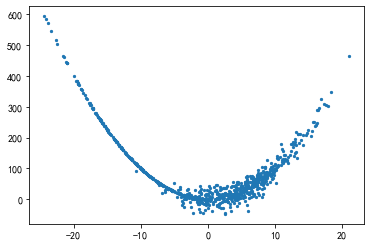

In [ ]:
# create data with different density
x1 = np.random.normal(5, 5, 500)
y1 = np.random.normal(0, 20, 500) + x1 ** 2 
x2 = np.random.normal(-10, 6, 300)
y2 = x2 ** 2 
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
data = np.vstack([x, y]).T 

plt.scatter(data[:, 0], data[:, 1], s=5)
plt.show()

## diffusing and see how probabilities change

In [ ]:
# calculate distance matrix
dist = squareform(pdist(data, metric='euclidean'))  # (120, 120)
# calculate affinity matrix
sigma = 1
affinity = np.exp(-(dist/sigma) ** 2)
# calculate Markov matrix
D = np.diag(affinity.sum(axis=1))   # a diagonal matrix of row sum of affinity matrix
M = np.linalg.inv(D) @ affinity            # (120, 120)

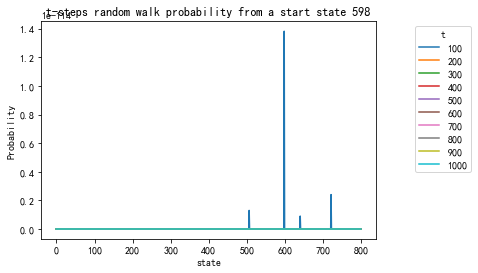

In [ ]:
start = np.random.choice(data.shape[0]) # (119,)

ts = np.arange(100, 1100, 100)
Mpow = M[:, :, None] ** ts  # diffusion for t random steps (120, 120, 10) 
for i, t in enumerate(ts):
    plt.plot(Mpow[start][:, i], label=f"{t}")

plt.legend(bbox_to_anchor=(1.3, 1), title="t")
plt.xlabel("state")
plt.ylabel("Probability")
# plt.ylim(0, 1)
plt.title(f"t-steps random walk probability from a start state {start}")
plt.show()

## find steady state vector

- the first left vector is steady state vector

In [ ]:
eigvals, eigvecs = np.linalg.eigh(M) # eigendecomposition of Markov matrix (120,), (120, 120)
eigvals, eigvecs = eigvals[::-1][:-1], np.flip(eigvecs, axis=1)[:,1:]  # sort and remove first trivial eigenvector
diffmap = (eigvals ** t) * eigvecs # diffusion maps for t random steps (120, 119)